In [48]:
#Настройка предупреждений
import warnings
warnings.simplefilter('ignore')

#Отображение графиков в самом jupyter
%pylab inline

#Увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [49]:
df = pd.read_csv('C:\PyCharmProjects\practice\data\stat.csv',sep=';')
df.shape

(47774, 4)

In [55]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 7 columns):
id                    47774 non-null object
category_path         47774 non-null object
expected_img_count    47774 non-null int64
real_img_count        47774 non-null int64
count_diff            47774 non-null int64
category              47774 non-null object
main_category         47774 non-null object
dtypes: int64(3), object(4)
memory usage: 2.6+ MB


,id,category_path,expected_img_count,real_img_count,count_diff,category,main_category
0,2081584,A\A21\A21B\A21B1\A21B122,2,0,2,A21B122,A
1,2120757,A\A21\A21B\A21B1\A21B122,2,1,1,A21B122,A
2,2275026,A\A21\A21B\A21B1\A21B122,4,1,3,A21B122,A
3,2068641,A\A21\A21B\A21B1\A21B122,2,0,2,A21B122,A
4,2133093,A\A21\A21B\A21B1\A21B122,4,2,2,A21B122,A


### Ожидаемое  и  собранное число изображений

In [88]:
df[['expected_img_count','real_img_count']].sum()

expected_img_count    345367
real_img_count        212591
dtype: int64

### Получение разницы между ожидаемым и реальным числом собранных изображений

In [51]:
df['count_diff'] = [row['expected_img_count'] - row['real_img_count'] for index, row  in df.iterrows()]

### Выделение основных и уникальнах категории на основе структуры пути

In [95]:
df['category'] = [full_path.rsplit('\\')[-1] for full_path in df['category_path']]
print(len(df.groupby('category').count()))

df['main_category'] = [full_path.rsplit('\\')[0] for full_path in df['category_path']]
print(len(df.groupby('main_category').count()))

7759
8


### Распределение числа патентов по основным категориям
* A — УДОВЛЕТВОРЕНИЕ ЖИЗНЕННЫХ ПОТРЕБНОСТЕЙ ЧЕЛОВЕКА
* B — РАЗЛИЧНЫЕ ТЕХНОЛОГИЧЕСКИЕ ПРОЦЕССЫ; ТРАНСПОРТИРОВАНИЕ
* C — ХИМИЯ; МЕТАЛЛУРГИЯ
* D — ТЕКСТИЛЬ; БУМАГА
* E — СТРОИТЕЛЬСТВО; ГОРНОЕ ДЕЛО
* F — МАШИНОСТРОЕНИЕ; ОСВЕЩЕНИЕ; ОТОПЛЕНИЕ; ДВИГАТЕЛИ И НАСОСЫ; ОРУЖИЕ И БОЕПРИПАСЫ; ВЗРЫВНЫЕ РАБОТЫ
* G — ФИЗИКА
* H — ЭЛЕКТРИЧЕСТВО


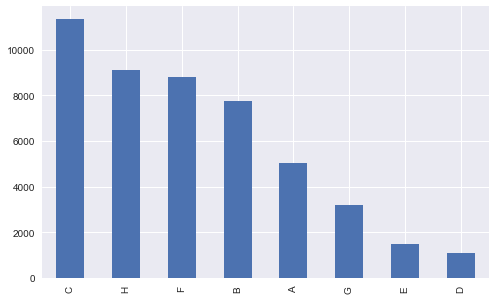

In [53]:
df['main_category'].value_counts().plot.bar()

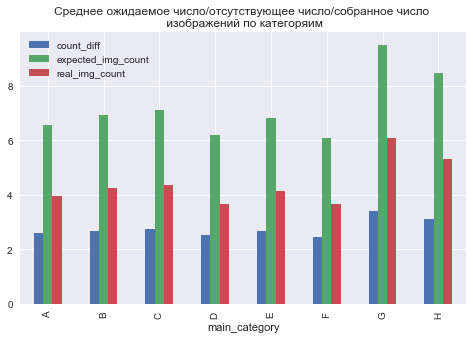

In [81]:
df.groupby('main_category')['count_diff','expected_img_count','real_img_count'].mean().plot.bar(
    title='Среднее ожидаемое число/отсутствующее число/собранное число \n изображений по категоряим')

### Сумарное число ожидаемого кол-ва изображений/ отсутсвующего кол-ва/ собранного  кол-ва изображений по категориям

In [84]:
df.pivot_table(values=['count_diff','expected_img_count','real_img_count'],index=['main_category'], aggfunc=np.sum)

,count_diff,expected_img_count,real_img_count
main_category,,,
A,13029,32948,19919
B,20899,53911,33012
C,31118,80524,49406
D,2774,6823,4049
E,3981,10134,6153
F,21543,53689,32146
G,10935,30338,19403
H,28497,77000,48503
